# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [76]:
df = pd.read_csv("data/advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Exploratory Data Analysis

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [78]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [79]:
# comprobamosque estén bien balanceadas las variables categóricas
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [80]:
# Ver si hay nulos en el dataset
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

---
### Pairplot para visualizar relaciones

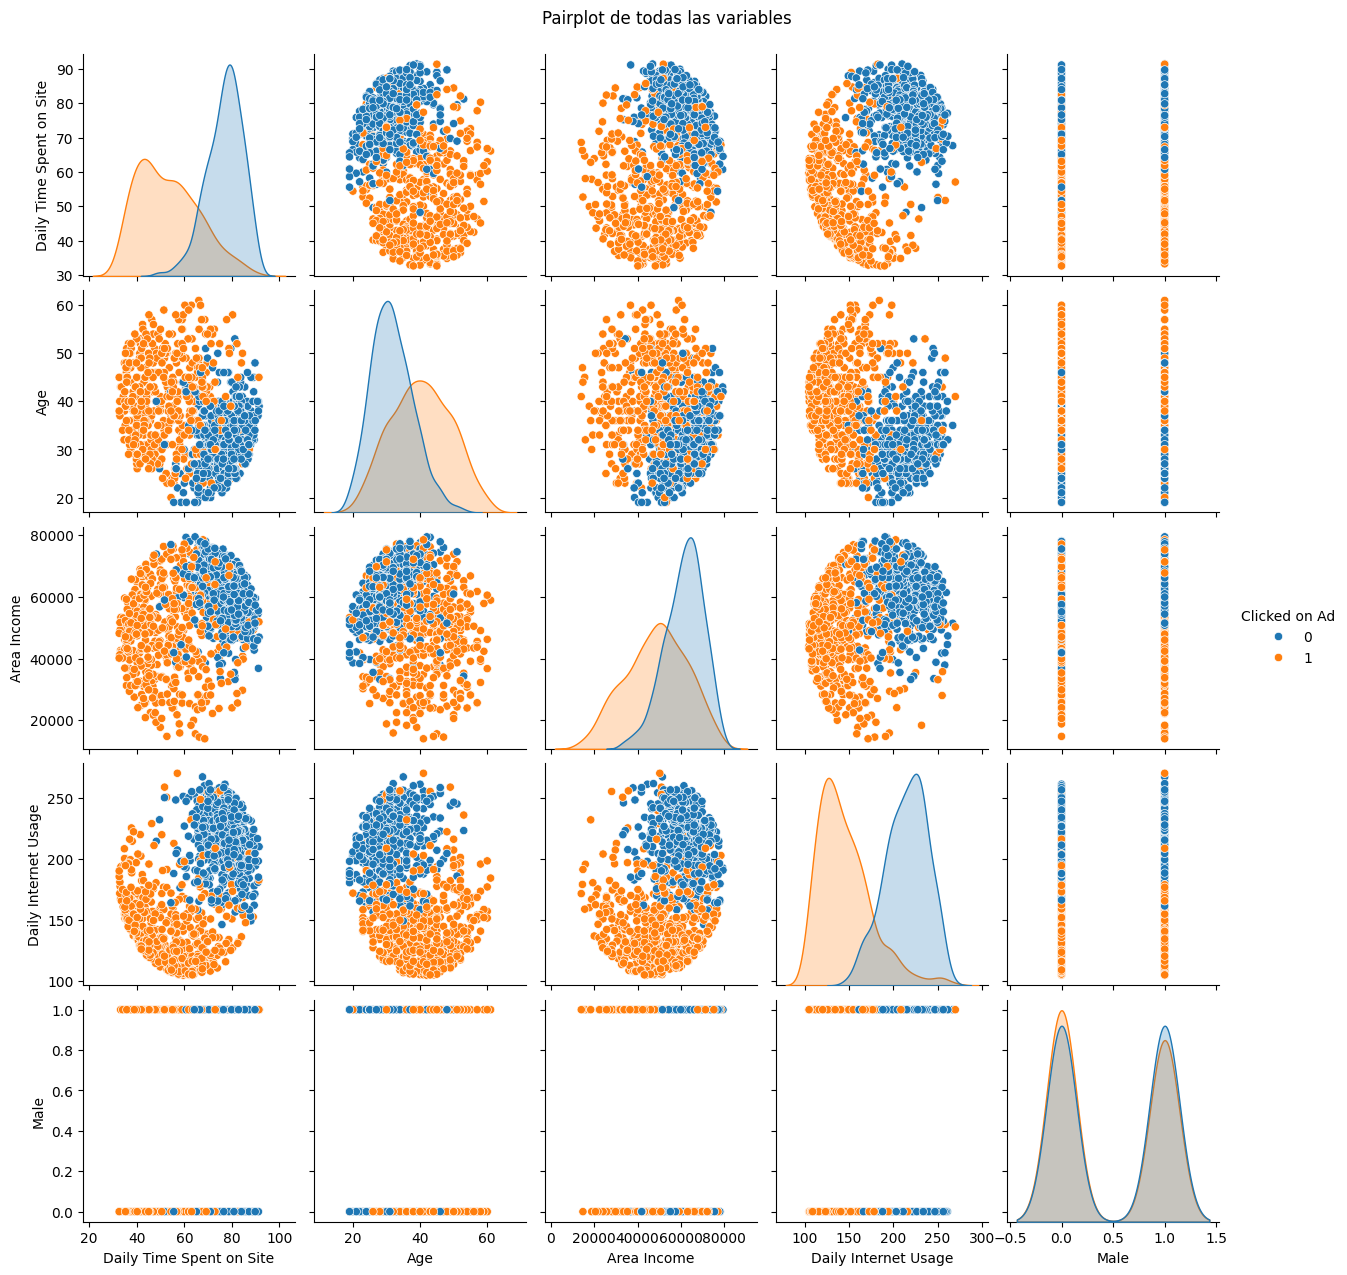

In [81]:
sns.pairplot(df, hue='Clicked on Ad')
plt.suptitle("Pairplot de todas las variables", y=1.02)
plt.show()

### que nos dice el pairplot
- Daily Time Spent on Site: Se concentra principalmente entre 30 y 90 minutos diarios; se ve una diferencia en cómo están distribuidos los usuarios que hicieron clic (naranja) frente a los que no (azul), aunque no es radical, sí se nota cierta separación en la densidad.

- Age: Está en un rango aproximado de 18 a 60 años. Hay indicios de que conforme aumenta la edad hay más probabilidad de que el punto sea naranja (Clicked on Ad = 1), aunque esto requiere confirmación con un análisis más profundo.

- Area Income: Oscila aproximadamente de 20,000 a 80,000 en moneda local. La variable parece mostrar una distribución relativamente amplia, pero se observan más puntos naranjas en un rango medio-bajo de ingresos.

- Daily Internet Usage: Va de aproximadamente 100 a 300 minutos diarios; aquí se aprecia que quienes hacen clic (naranja) tienen una distribución que se superpone bastante con los que no hacen clic (azul), pero podría haber diferencias en grupos específicos.

- Male: Es una variable binaria (0 o 1), por lo que la diagonal muestra un histograma con dos grandes picos. A simple vista, no parece haber un desequilibrio muy marcado entre naranjas y azules en cada categoría.


- **Edad y tiempo en el sitio podrían ser factores relevantes**

- ***Los “clics” están algo más concentrados en usuarios de mayor edad.***

#### El tiempo que pasan en el sitio, cruzado con la edad, podría ser la interacción más interesante.



---

### Visualizar la distribución de "Daily Time Spent on Site" segmentado por "Clicked on Ad"

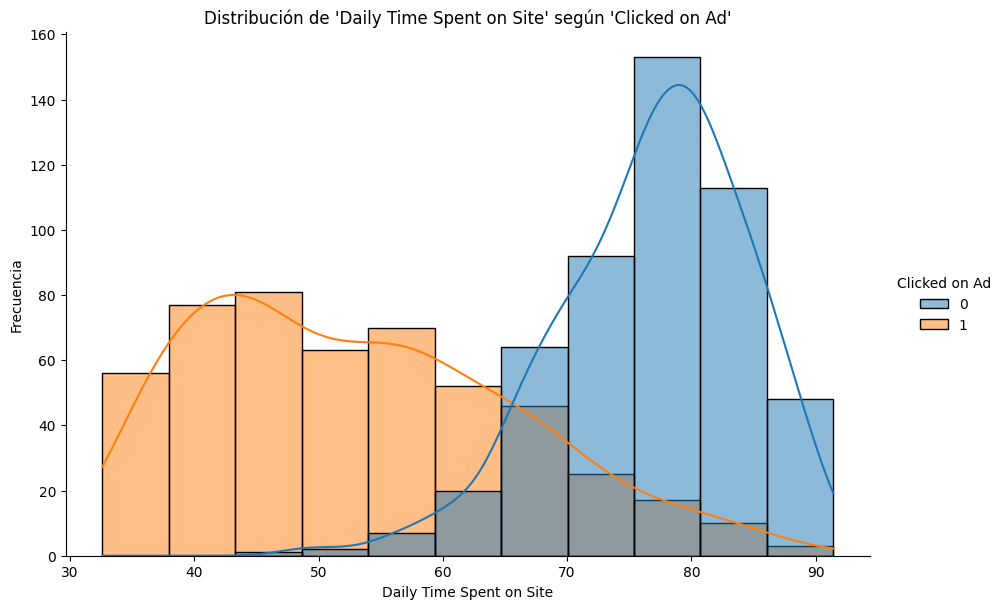

In [82]:
# Visualizar la distribución de "Daily Time Spent on Site" segmentado por "Clicked on Ad"
sns.displot(data=df, x="Daily Time Spent on Site", hue="Clicked on Ad", kde=True, height=6, aspect=1.5)
plt.title("Distribución de 'Daily Time Spent on Site' según 'Clicked on Ad'")
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Frecuencia")
plt.show()

- Los usuarios que hicieron click, (naranja) están más concentrados entre 30 y 60 min, con un pico entre 40-50 minutos. La curva de densidad después de 60 min desciende de manera notable.
- Los usuarios que no hicieron click (azul) se concentra más hacia la derecha, entre 60 y 90 min. Pico en 75-80 min. La curva aunmenta fuertemente a partir de 60 min, mayor tiempo en el sitio, menor propensión a hacer click.

---

### Representación de Edad vs. Daily Time Spent on Site

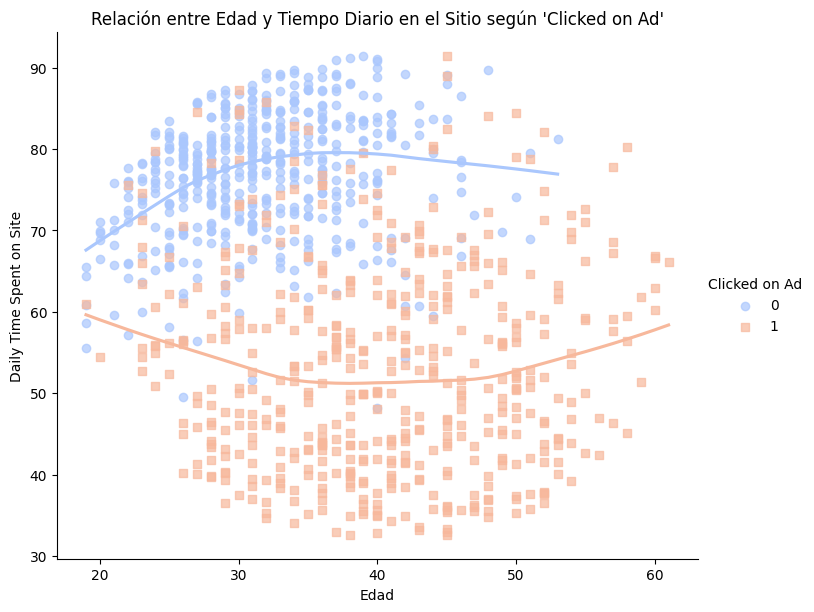

In [83]:

# El parámetro hue diferencia el grupo según la variable "Clicked on Ad"
sns.lmplot(data=df, 
           x="Age", 
           y="Daily Time Spent on Site", 
           hue="Clicked on Ad",
           palette="coolwarm",
           markers=["o", "s"],
           scatter_kws={'alpha':0.7},
           height=6,
           aspect=1.2,
           lowess=True)  # lowess suaviza la tendencia sin asumir una forma lineal estricta

plt.title("Relación entre Edad y Tiempo Diario en el Sitio según 'Clicked on Ad'")
plt.xlabel("Edad")
plt.ylabel("Daily Time Spent on Site")
plt.show()

- La suavización (lowess) revela que, para usuarios sin clic, el tiempo en el sitio aumenta con la edad, mientras que para quienes hacen clic, disminuye. En resumen, lowess destaca una relación positiva entre edad y tiempo para no clic y negativa para clic. (los que pasan más tiempo navegando no hacen clic, los que están menos timepo interactuan más con los anuncios)

---
### Matriz de correlación

Tipos de datos en el DataFrame:
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object


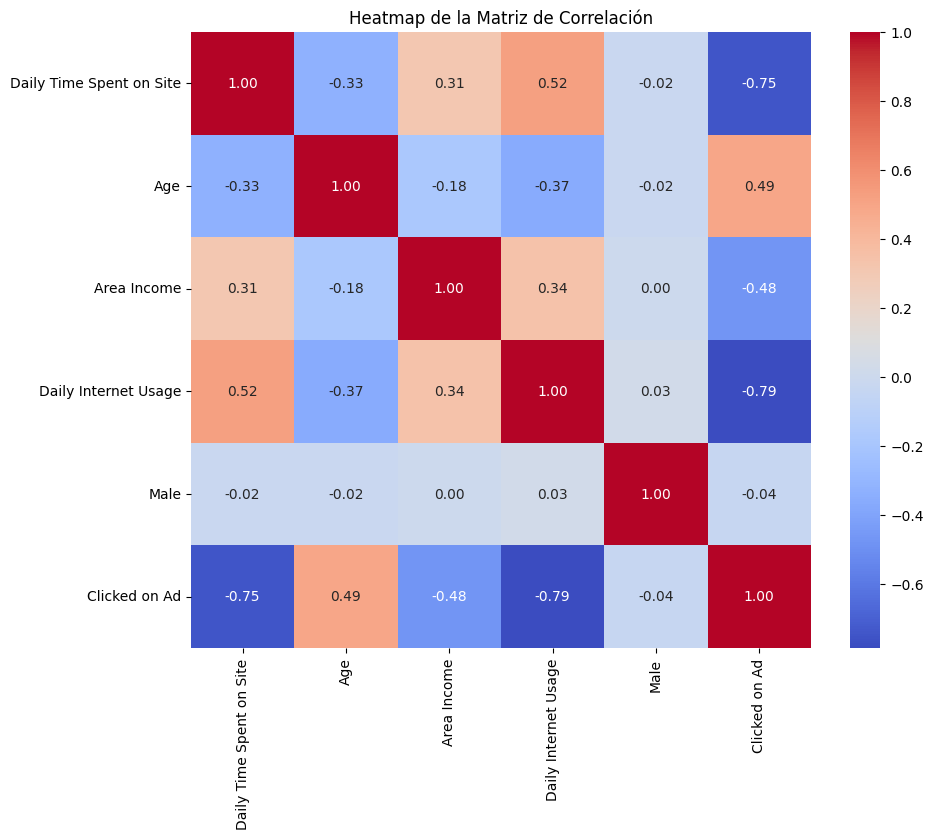

In [84]:
# Mostrar los tipos de datos para identificar columnas no numéricas
print("Tipos de datos en el DataFrame:")
print(df.dtypes)

# Seleccionar solo las columnas numéricas para evitar errores
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de la Matriz de Correlación")
plt.show()

---
- Daily Time Spent on Site vs. Clicked on Ad (-0.75) mayor tiempo en el sitio, menor probabilidad de hacer clic.
- Daily Internet Usage vs. Clicked on Ad (-0.79) Correlación negativa más fuerte, quienes más navegan en internet en general (minutos totales), tienden a hacer clic con menor frecuencia.
- Age vs. Clicked on Ad (0.49) positiva moderada: a mayor edad, mayor tendencia a hacer clic.
- Area Income vs. Clicked on Ad (-0.48), ingresos más altos se asocian a menor probabilidad de clic.
- A mayor tiempo en el sitio y mayor uso diario de internet, menor es la probabilidad de hacer clic, mientras que la edad se asocia positivamente con el clic. Además, se observa que los ingresos tienen una correlación negativa moderada y que el género (Male) prácticamente no influye en el comportamiento de clic.

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [85]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [86]:
df["Ad Topic Line"].nunique()

1000

In [87]:
df["Ad Topic Line"].str.split(" ")

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [88]:
lista_palabras=[]
for topic in df["Ad Topic Line"]:
    for palabras in topic.split(" "):
        lista_palabras.append(palabras.lower())

In [89]:
pd.Series(lista_palabras).value_counts()

interface          33
solution           29
system             24
user               24
secured            23
                   ..
static              4
persistent          4
profit-focused      4
intelligence        4
functionalities     4
Name: count, Length: 315, dtype: int64

In [90]:
df["Topic_solution"] = np.where(df["Ad Topic Line"].str.contains("solution"), 1, 0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


In [91]:
df["Topic_solution"].value_counts()

Topic_solution
0    964
1     36
Name: count, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del encoder
encoder = LabelEncoder()

In [93]:
df["City_encoded"] = encoder.fit_transform(df["City"])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935


In [94]:
# One Hot Encoding es lo más apropiado
# Convertir la columna "Country" en variables dummy
pd.get_dummies(df["Country"])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
encoder = LabelEncoder()
df["Country_encoded"] = encoder.fit_transform(df["Country"])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded,Country_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126,116
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488,26
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1,798,140
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935,85


In [96]:
df["Country"].nunique()

237

In [97]:
df.columns
# Eliminar columnas innecesarias

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Topic_solution', 'City_encoded',
       'Country_encoded'],
      dtype='object')

In [98]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [99]:
df["month"] = df["Timestamp"].dt.month
df["day"] = df["Timestamp"].dt.day
df["week_day"] = df["Timestamp"].dt.weekday
df["hour"] = df["Timestamp"].dt.hour
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded,Country_encoded,month,day,week_day,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961,215,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903,147,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111,184,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939,103,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805,96,6,3,4,3


In [100]:
df.groupby("month")["Clicked on Ad"].mean()

month
1    0.469388
2    0.518750
3    0.474359
4    0.503401
5    0.537415
6    0.500000
7    0.495050
Name: Clicked on Ad, dtype: float64

In [101]:
df.groupby("hour")["Clicked on Ad"].mean()

hour
0     0.577778
1     0.500000
2     0.472222
3     0.547619
4     0.500000
5     0.477273
6     0.589744
7     0.481481
8     0.488372
9     0.571429
10    0.451613
11    0.600000
12    0.421053
13    0.500000
14    0.488372
15    0.542857
16    0.410256
17    0.560976
18    0.609756
19    0.487179
20    0.480000
21    0.395833
22    0.441860
23    0.409091
Name: Clicked on Ad, dtype: float64

In [102]:
df.groupby("week_day")["Clicked on Ad"].mean()

week_day
0    0.514286
1    0.450820
2    0.506410
3    0.556338
4    0.458065
5    0.507937
6    0.503145
Name: Clicked on Ad, dtype: float64

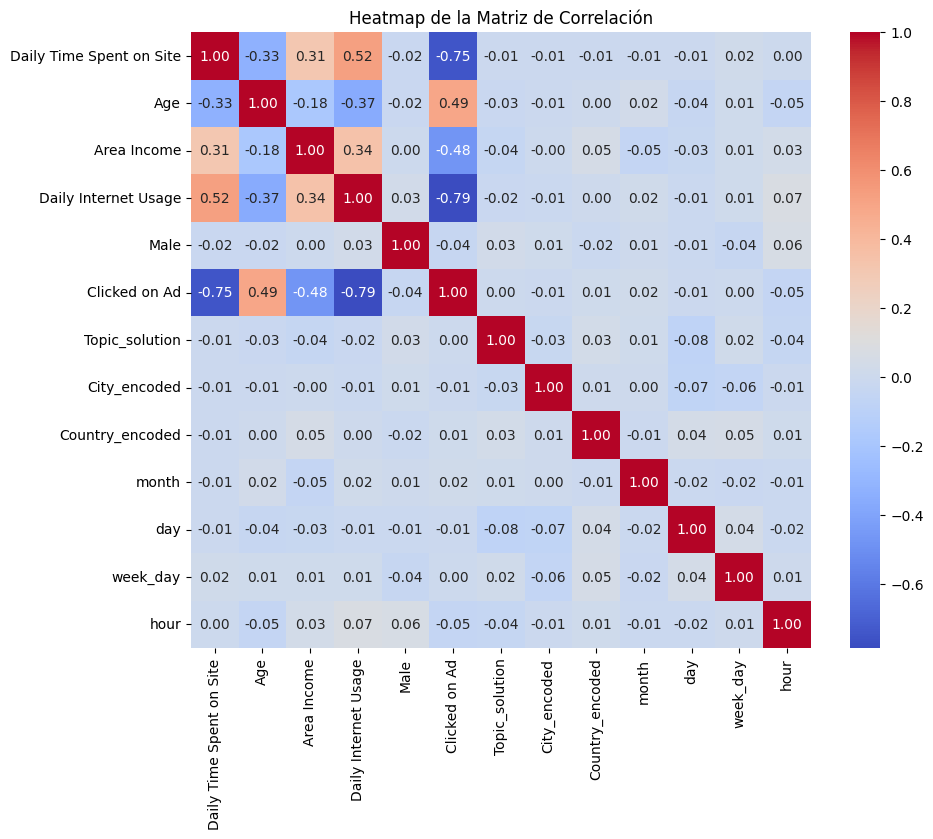

In [103]:
# Hacer matriz de correlación

# Seleccionar solo las columnas numéricas para evitar errores
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de la Matriz de Correlación")
plt.show()

In [104]:
# Interacción entre 'Age' y 'Daily Time Spent on Site'
df["Age_Time"] = df["Age"] * df["Daily Time Spent on Site"]

# Seleccionar las variables predictoras y la variable objetivo.
# Se incluyen las variables originales y la nueva característica 'Age_Time'
features = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male", "Age_Time"]
X = df[features]
y = df["Clicked on Ad"]



#### 2. Train test split


In [105]:
# Dividir el dataset en un 80% para entrenamiento y un 20% para prueba
# Se utiliza un random_state para asegurar la reproducibilidad de los resultados. El número 42 es arbitrario 
# y es comúnmente utilizado, cualquier otro número fijo sirve para asegurar la reproducibilidad.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3. StandardScaler()


In [106]:
# Estandarizar las variables numéricas para que tengan media 0 y desviación 1
# Asi nos asehramos que las variables estén en la misma escala y no haya una variable que domine a las demás.

scaler = StandardScaler() # Crea objeto scaler para calcular la media y desviación estandar
# de cada caracteristica en el conjunto de entrenamoiento.
x_train_scaled = scaler.fit_transform(x_train) # fit calcula la media y desviación estandar para cada var x_train.
# transform scala x_train usando la media y desviación estandar calculadas en el fit.
# Se aplica la misma transformación al conjunto de prueba para que tenga la misma escala.
x_test_scaled = scaler.transform(x_test)


In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(200, 6)
(800,)
(200,)


- 800 muestras al conjunto de entrenamiento y 200 al de prueba, manteniendo la correspondencia entre las características y sus etiquetas.

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [108]:
# LogisticRegression es un modelo de clasificación. Se utiliza para predecir una categoría(ejemplo: si un usuario hará clic en un anuncio o no).
# En este caso, la variable objetivo es binaria (0 o 1), se puede predecir la probabilidad de que un usuario haga clic en un anuncio.
from sklearn.linear_model import LogisticRegression 

# Función que sirve para hacer validación cruzada.
# cross_val_score se utiliza para evaluar el rendimiento del modelo utilizando validación cruzada.
# La validación cruzada es una técnica que se utiliza para evaluar la capacidad de generalización de un modelo.
from sklearn.model_selection import cross_val_score

# accuracy_score(y_true, y_pred): calcula el porcentaje de aciertos (predicciones correctas).
# confusion_matrix(y_true, y_pred): muestra una matriz de confusión, que indica cuántos ejemplos se clasificaron 
# bien o mal para cada clase.
# classification_report(y_true, y_pred): da un resumen con varias métricas: precision, recall,
# f1-score y accuracy, para cada clase.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creamos el modelo de regresión logística
# Se establece max_iter=1000 para asegurar la convergencia y random_state para reproducibilidad.
# Convergencia significa que el modelo llegó a una solución estable, ya ha aprendido suficiente y se detiene.
model = LogisticRegression(max_iter=1000, random_state=42)

- Accuracy: porcentaje de clasificaciones correctas.
- Matriz de confusión: te dice cuántos errores cometió el modelo y en qué clases.
- Classification report: incluye métricas como precisión (precision), exhaustividad (recall), y F1.
- Cross-validation: cómo rinde el modelo en varios "cortes" del dataset.

In [109]:
# Validación Cruzada (Cross-Validation)

# cross_val_score devuelve una lista de puntuaciones de precisión para cada una de las 5 divisiones.
# cv=5 = va a usar validación cruzada con 5 partes (o "folds"), el conjunto de entrenamiento se divide en 5 bloques:
# En cada repetición, 4 partes se usan para entrenar y 1 para probar.
# Esto se repite 5 veces, cambiando cada vez la parte que se usa para validar.

# scoring='accuracy' = Ese parámetro le dice a cross_val_score qué métrica usar para evaluar el modelo.
# Accuracy = porcentaje de predicciones correctas(cuántas veces el modelo acertó comparado con el total de casos)

cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')

# Puntuaciones de Accuracy en Cross Validation
print("Puntuaciones de Accuracy en CV:", cv_scores)
print()
print("Promedio de Accuracy en CV:", np.mean(cv_scores))

Puntuaciones de Accuracy en CV: [0.98125 0.9875  0.96875 0.94375 0.9875 ]

Promedio de Accuracy en CV: 0.9737500000000001


---
### Quizás hubiese sido mejor escoger el Recall en el scoring

---

- Puntuaciones de Accuracy en CV: Fold 1 :98.13% de aciertos, f2:98.75%, f3:96.88%, f4:94.38%, f5:98.75%
- Accuracy promedio = 97.38% (El modelo acertó el 97.38% de las veces durante la validación cruzada.)
- Significa que tiene un accuracy alto y es un modelo consistente (los valores no varían mucho entre folds).


In [110]:
# Entrenamiento del modelo
# x_train, los datos de entrada (características) que el modelo usará para aprender.
# y_train,respuestas correctas (lo que el modelo tiene que aprender a predecir).
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [111]:
# Predicción y evaluación en el conjunto de prueba
# aquí le pedimos que use lo que aprendió y predecíque prediga los resultados para estos nuevos datos
y_pred = model.predict(x_test_scaled)


In [112]:
# Calcular la exactitud (accuracy)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en el conjunto de prueba:", test_accuracy)


Accuracy en el conjunto de prueba: 0.955


# 4. Evaluation

In [122]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])


#### 1. Confusion Matrix

- El modelo acertó el 95.5% de las veces en los datos nuevos (los que no vio durante el entrenamiento).
- No hay overfitting (si el modelo estuviera sobreajustado, esperaría un accuracy mucho más bajo)

In [113]:
# Matriz de confusión (dónde acertó y dónde se equivocó)
# Es una tabla que compara, y_test → las etiquetas reales. y_pred → las predicciones del modelo.
# Y muestra cuántas veces el modelo:Adivinó correctamente Se equivocó (y cómo)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))



Matriz de confusión:
[[ 85   4]
 [  5 106]]


- Clasificó correctamente casi todos los casos. Solo se equivocó en 9:
    - 4 veces confundió clase 0 con 1.
    - 5 veces confundió clase 1 con 0.


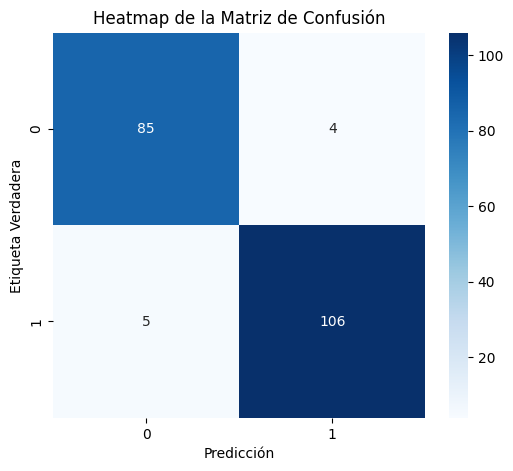

In [114]:
# matriz de confusión de un modelo de clasificación binaria.
# fmt="d": formato de los números (d = decimal, o sea, enteros).
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Heatmap de la Matriz de Confusión")
plt.show()

### Valores de la matriz
    - Verdaderos Negativos (TN): 85 (fila 0, columna 0)
    - Falsos Positivos (FP): 4 (fila 0, columna 1)
    - Falsos Negativos (FN): 5 (fila 1, columna 0)
    - Verdaderos Positivos (TP): 106 (fila 1, columna 1)
- Alto número de aciertos:
    - El modelo clasifica correctamente 85 casos como “no hizo clic” (cuando en realidad no hicieron clic) y 106 casos como “sí hizo clic” (cuando efectivamente hicieron clic).
    - Esto se traduce en un total de 191 aciertos (85 + 106) sobre 200 muestras.
- Bajo número de errores:
    - Solo hay 4 falsos positivos (predijo clic cuando en realidad no hubo clic) y 5 falsos negativos (predijo no clic cuando el usuario sí hizo clic).
- ***En conjunto, la matriz evidencia un modelo con muy buen rendimiento, capaz de distinguir entre quienes hacen clic y quienes no, cometiendo pocos errores de ambos tipos (FP y FN).***


#### 2. Precision

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calcular la precision en el conjunto de prueba
precision_test = precision_score(y_test, y_pred)
print("\nPrecision en el conjunto de prueba:", precision_test)

# Reporte completo de clasificación (incluye precision, recall, f1-score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Precision en el conjunto de prueba: 0.9636363636363636

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        89
           1       0.96      0.95      0.96       111

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



- Clase 0:
    - Precision 0.94: De todas las veces que el modelo dijo "es clase 0", acertó el 94%.
    - Recall 0.96: De todos los casos que realmente eran clase 0, el modelo detectó el 96%.
    - F1-score 0.95: Equilibrio entre precision y recall, muy bueno.
    - Support 89: Había 89 ejemplos reales de clase 0.
- Clase 1:
    - Precision 0.96: De las veces que dijo "es clase 1", acertó el 96%.
    - Recall 0.95: De los casos reales de clase 1, detectó el 95%.
    - F1-score 0.96: También excelente.
    - Support 111: Había 111 ejemplos de clase 1.

- Accuracy: 0.95. El modelo acertó el 95% del total de predicciones (191 de 200).
-  Macro avg:Promedio simple de cada métrica entre clases (sin importar cuántos datos tiene cada una).Ver si tu modelo trata todas las clases por igual.
    - Precision: 0.95
    - Recall: 0.96
    - F1-score: 0.95
- Weighted avg: Promedio ponderado, teniendo en cuenta cuántos ejemplos tiene cada clase (más justo si hay clases desbalanceadas).Refleja mejor el rendimiento global real.


#### 3. Recall

In [116]:
from sklearn.metrics import recall_score

# Mide la proporción de verdaderos positivos entre todos los casos positivos reales.
# Calcular el recall en el conjunto de prueba
recall_test = recall_score(y_test, y_pred)
print("\nRecall en el conjunto de prueba:", recall_test)


Recall en el conjunto de prueba: 0.954954954954955


- Significa que el modelo está identificando correctamente el 95.5% de los casos positivos. Es decir, de todos los usuarios que realmente hicieron clic, el modelo logra detectar al 95.5% de ellos. Esto indica una alta capacidad del modelo para reconocer los casos positivos, minimizando los falsos negativos.

#### 4. F1 Score

- F1 Score es la media armónica (compendio entre el precision y el recall, penaliza mucho si es muy bajo)

In [117]:
from sklearn.metrics import f1_score
# Mide la precisión y el recall en un solo número.

# Calcula el F1 Score en el conjunto de prueba
f1_test = f1_score(y_test, y_pred)
print("\nF1 Score en el conjunto de prueba:", f1_test)


F1 Score en el conjunto de prueba: 0.9592760180995475


- El F1 Score de 0.9593 indica un excelente equilibrio entre precisión y recall. Esto significa que el modelo no solo clasifica correctamente la mayoría de las instancias positivas, sino que también detecta casi todos los casos positivos reales, logrando una efectividad global muy alta en la clasificación.

#### 5. ROC curve

- La función ROC curve calcula la tasa de falsos positivos, y la tasa de verdaderos positivos.
- AUC calcula el área bajo la curva, que es una medida global del desempeño del modelo.
- AUC= Area under de curve


In [118]:
# Verifico si el modelo está desbalanceado
print(y_test.value_counts())

Clicked on Ad
1    111
0     89
Name: count, dtype: int64


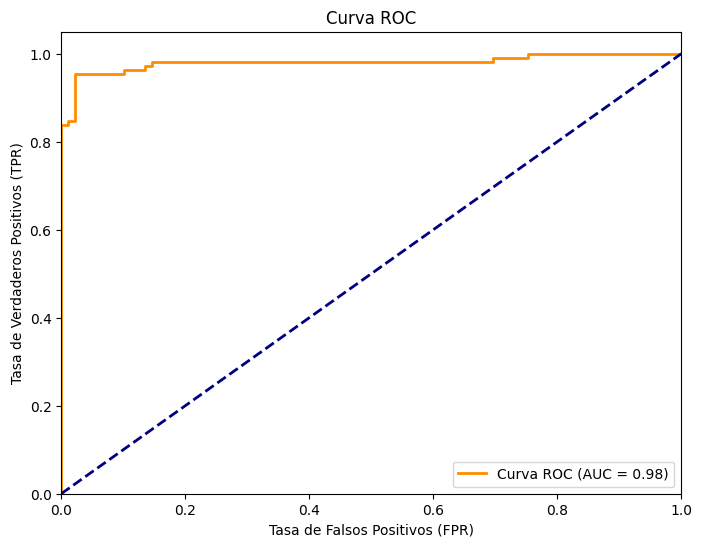

In [119]:

from sklearn.metrics import roc_curve, auc

# Generar las probabilidades de predicción para la clase positiva (1)
y_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calcular los valores de FPR, TPR y los umbrales asociados
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia (modelo aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Muestra que el modelo distingue muy bien entre las clases (clic vs. no clic). Se acerca al punto (0,1) de máxima sensibilidad y mínimo error para la mayoría de los umbrales. El área bajo la curva (AUC = 0.98) es muy alta y confirma que, en promedio, el modelo tiene un 98% de probabilidad de asignar una puntuación más alta al caso positivo que al negativo. Esto refleja un excelente desempeño al clasificar correctamente quién hace clic y quién no.

In [120]:
# Imprimir el rango de probabilidades predichas, para comprobar si está bien calibrado
print("Rango de probabilidades:", np.min(y_proba), np.max(y_proba))

# El modelo asigna a las muestras del conjunto de prueba probabilidades muy bajas (mínimo ≈ 0.0029) hasta casi 1 (máximo ≈ 0.999995),
# lo que sugiere una excelente discriminación entre las clases.
# Hay muestras a las que el modelo asigna muy baja probabilidad de pertenecer
# a la clase positiva y otras a las que asigna casi seguridad de que pertenecen a la clase positiva.


Rango de probabilidades: 0.0028990394923482364 0.9999954304395483




#### 6. P-R curve

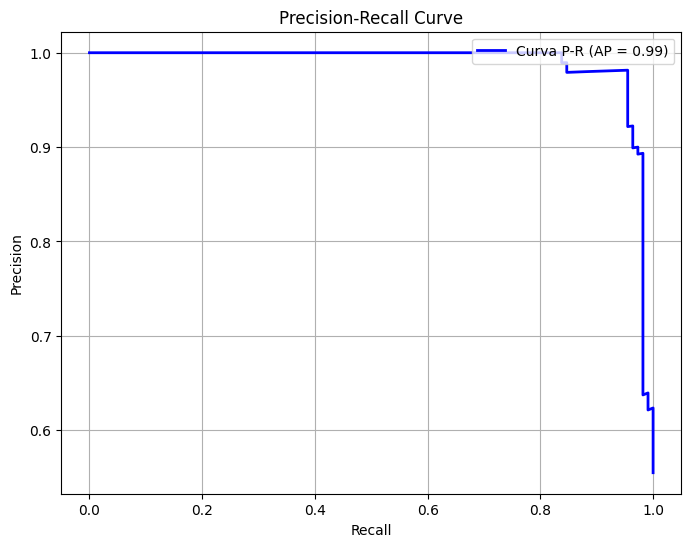

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Obtener las probabilidades de la clase positiva para el conjunto de prueba
y_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calcular precision, recall y umbrales para la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# Calcular la precisión promedio (Average Precision)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva P-R (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

- La precisión se mantiene cercana a 1 durante la mayor parte del rango de recall, lo que significa que casi todos los positivos que predice el modelo son realmente positivos.
- El valor de AP = 0.99 (Average Precision) confirma que, en promedio, el modelo clasifica la clase positiva con gran exactitud y detecta un alto porcentaje de los verdaderos positivos.
- l modelo comete muy pocos falsos positivos y falsos negativos, ofreciendo un excelente equilibrio entre precisión y sensibilidad.

## Conclusión final

Es posible construir un modelo de regresión logística muy efectivo para predecir el comportamiento del usuario (en este caso, si hace o no clic en un anuncio). 

Rendimiento del modelo:
Los resultados de la validación cruzada, junto con métricas en el conjunto de prueba (precisión, recall, F1 Score) y las gráficas de evaluación (ROC y Precision-Recall), indican un desempeño sobresaliente. Con un F1 Score y un Average Precision cercanos a 0.96–0.99, y un AUC en la curva ROC muy alto, el modelo logra distinguir de forma casi perfecta entre usuarios que hacen clic y los que no.